In [67]:
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def unnormalised_best_subspan_em(
    prediction, ground_truths
) -> float:
    for ground_truth in ground_truths:
        if ground_truth.lower() in prediction.lower():
            return 1.0
    return 0.0

In [18]:
decore_cb_filepath = "../predictions/musique_closed_book/pred_MuSiQue_DeCoReEntropy.json"
decore_ob_filepath = "../predictions/musique_open_book/pred_MuSiQue_DeCoReEntropy.json"
baseline_cb_filepath = "../predictions/musique_closed_book/pred_MuSiQue_Baseline.json"
baseline_ob_filepath = "../predictions/musique_open_book/pred_MuSiQue_Baseline.json"
dola_cb_filepath = "../predictions/musique_closed_book/pred_MuSiQue_DoLa.json"
dola_ob_filepath = "../predictions/musique_open_book/pred_MuSiQue_DoLa.json"

def load_data(filepath):
    data = []
    with open(filepath, "r") as f:
        for line in f:
            data += [json.loads(line)]
    
    predicted_answers = []
    paragraphs = []
    questions = []
    answers = []
    alphas = []
    lengths = []
    labels = []
    for i in range(len(data)):
        answers_list = [ans[0] for ans in data[i]["answers"]]

        is_correct = unnormalised_best_subspan_em(data[i]["predicted_answer"], answers_list)

        paragraphs += [data[i]["paragraphs"] if "paragraphs" in data[i] else []]
        questions += [data[i]["question"]]
        answers += [answers_list]
        predicted_answers += [data[i]["predicted_answer"]]
        if "dola" in filepath.lower():
            alphas += [data[i]["alphas"][0]]
            lengths += [len(data[i]["alphas"][0])]
        else:
            alphas += [data[i]["alphas"]]
            lengths += [len(data[i]["alphas"])]
        labels += [is_correct]

    return {
        "paragraphs": paragraphs,
        "questions": questions,
        "answers": answers,
        "predicted_answers": predicted_answers,
        "alphas": alphas,
        "lengths": lengths,
        "labels": labels
    }
    
decore_cb_data = load_data(decore_cb_filepath)
decore_ob_data = load_data(decore_ob_filepath)
baseline_cb_data = load_data(baseline_cb_filepath)
baseline_ob_data = load_data(baseline_ob_filepath)
dola_cb_data = load_data(dola_cb_filepath)
dola_ob_data = load_data(dola_ob_filepath)

decore_alphas_correct = [x for x, correct in zip(decore_ob_data["alphas"], decore_ob_data["labels"]) if correct]
decore_alphas_incorrect = [x for x, correct in zip(decore_ob_data["alphas"], decore_ob_data["labels"]) if not correct]
decore_lengths_correct = [x for x, correct in zip(decore_ob_data["lengths"], decore_ob_data["labels"]) if correct]
decore_lengths_incorrect = [x for x, correct in zip(decore_ob_data["lengths"], decore_ob_data["labels"]) if not correct]

baseline_alphas_correct = [x for x, correct in zip(baseline_ob_data["alphas"], baseline_ob_data["labels"]) if correct]
baseline_alphas_incorrect = [x for x, correct in zip(baseline_ob_data["alphas"], baseline_ob_data["labels"]) if not correct]
baseline_lengths_correct = [x for x, correct in zip(baseline_ob_data["lengths"], baseline_ob_data["labels"]) if correct]
baseline_lengths_incorrect = [x for x, correct in zip(baseline_ob_data["lengths"], baseline_ob_data["labels"]) if not correct]

dola_alphas_correct = [x for x, correct in zip(dola_ob_data["alphas"], dola_ob_data["labels"]) if correct]
dola_alphas_incorrect = [x for x, correct in zip(dola_ob_data["alphas"], dola_ob_data["labels"]) if not correct]
dola_lengths_correct = [x for x, correct in zip(dola_ob_data["lengths"], dola_ob_data["labels"]) if correct]
dola_lengths_incorrect = [x for x, correct in zip(dola_ob_data["lengths"], dola_ob_data["labels"]) if not correct]

In [19]:
print("len(decore_alphas_correct): ", len(decore_alphas_correct))
print("len(decore_alphas_incorrect): ", len(decore_alphas_incorrect))
print("len(decore_lengths_correct): ", len(decore_lengths_correct))
print("len(decore_lengths_incorrect): ", len(decore_lengths_incorrect))
print("len(baseline_alphas_correct): ", len(baseline_alphas_correct))
print("len(baseline_alphas_incorrect): ", len(baseline_alphas_incorrect))
print("len(baseline_lengths_correct): ", len(baseline_lengths_correct))
print("len(baseline_lengths_incorrect): ", len(baseline_lengths_incorrect))
print("len(dola_alphas_correct): ", len(dola_alphas_correct))
print("len(dola_alphas_incorrect): ", len(dola_alphas_incorrect))
print("len(dola_lengths_correct): ", len(dola_lengths_correct))
print("len(dola_lengths_incorrect): ", len(dola_lengths_incorrect))

len(decore_alphas_correct):  1799
len(decore_alphas_incorrect):  618
len(decore_lengths_correct):  1799
len(decore_lengths_incorrect):  618
len(baseline_alphas_correct):  1733
len(baseline_alphas_incorrect):  684
len(baseline_lengths_correct):  1733
len(baseline_lengths_incorrect):  684
len(dola_alphas_correct):  1722
len(dola_alphas_incorrect):  695
len(dola_lengths_correct):  1722
len(dola_lengths_incorrect):  695


(271265,)
(271265,)
271265


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_63620/1640891748.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

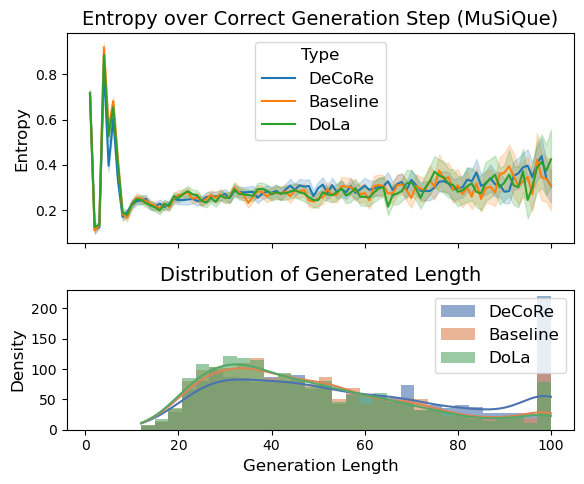

In [21]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_correct])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_correct])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_correct])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_correct])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_correct])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_correct])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)
data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

print(timesteps.shape)
print(data_flat.shape)
print(len(types))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True, gridspec_kw={'height_ratios': [3, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Correct Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_correct, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_correct, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_correct, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_open_book_llama3_8b_instruct_decore_entropy_alpha_correct_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [8]:
def auec(entropy_values):
    return np.trapz(entropy_values, range(len(entropy_values)))

In [11]:
# decore_auecs = []
# for alphas in decore_alphas_correct:
#     decore_auecs += [auec(alphas)]

# baseline_auecs = []
# for alphas in baseline_alphas_correct:
#     baseline_auecs += [auec(alphas)]

# dola_auecs = []
# for alphas in dola_alphas_correct:
#     dola_auecs += [auec(alphas)]


# print("DeCoRe AUEC:", np.mean(decore_auecs))
# print("Baseline AUEC:", np.mean(baseline_auecs))
# print("DoLa AUEC:", np.mean(dola_auecs))

decore_auecs = []
for alphas in decore_alphas_correct:
    decore_auecs += [sum(alphas)]

baseline_auecs = []
for alphas in baseline_alphas_correct:
    baseline_auecs += [sum(alphas)]

dola_auecs = []
for alphas in dola_alphas_correct:
    dola_auecs += [sum(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 16.4808968860133
Baseline AUEC: 14.684594582143877
DoLa AUEC: 14.164415196621903


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_54641/3302080535.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

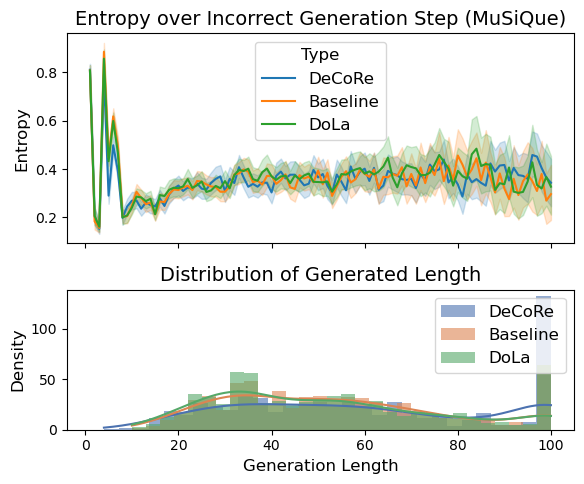

In [7]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_incorrect])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_incorrect])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_incorrect])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_incorrect])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_incorrect])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_incorrect])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)
data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True, gridspec_kw={'height_ratios': [3, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Incorrect Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_incorrect, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_incorrect, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_incorrect, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_open_book_llama3_8b_instruct_decore_entropy_alpha_incorrect_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [8]:
decore_auecs = []
for alphas in decore_alphas_incorrect:
    decore_auecs += [auec(alphas)]

baseline_auecs = []
for alphas in baseline_alphas_incorrect:
    baseline_auecs += [auec(alphas)]

dola_auecs = []
for alphas in dola_alphas_incorrect:
    dola_auecs += [auec(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 20.072419167970303
Baseline AUEC: 18.05710458467612
DoLa AUEC: 17.85904021141728


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_54641/1508334440.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

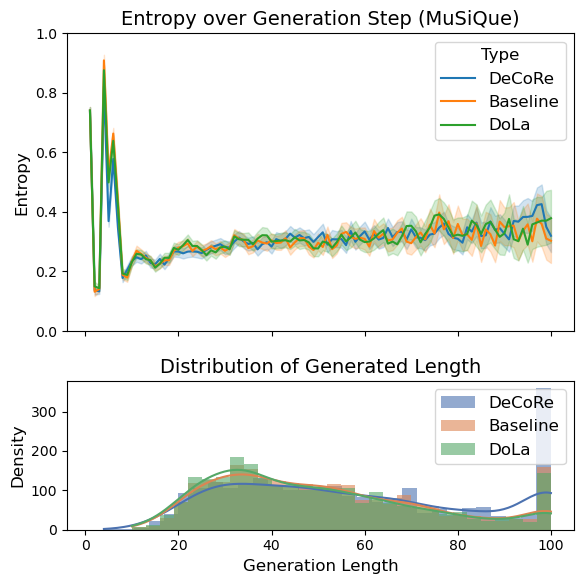

In [11]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_correct + decore_lengths_incorrect])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_correct + baseline_lengths_incorrect])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_correct + dola_lengths_incorrect])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_correct + decore_alphas_incorrect])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_correct + baseline_alphas_incorrect])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_correct + dola_alphas_incorrect])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)
data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_correct + decore_lengths_incorrect, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_correct + baseline_lengths_incorrect, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_correct + dola_lengths_incorrect, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_open_book_llama3_8b_instruct_decore_entropy_alpha_all_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [12]:
# decore_auecs = []
# for alphas in decore_alphas_incorrect:
#     decore_auecs += [auec(alphas)]

# baseline_auecs = []
# for alphas in baseline_alphas_incorrect:
#     baseline_auecs += [auec(alphas)]

# dola_auecs = []
# for alphas in dola_alphas_incorrect:
#     dola_auecs += [auec(alphas)]


# print("DeCoRe AUEC:", np.mean(decore_auecs))
# print("Baseline AUEC:", np.mean(baseline_auecs))
# print("DoLa AUEC:", np.mean(dola_auecs))


decore_auecs = []
for alphas in decore_alphas_correct + decore_alphas_incorrect:
    decore_auecs += [sum(alphas)]

baseline_auecs = []
for alphas in baseline_alphas_correct + baseline_alphas_incorrect:
    baseline_auecs += [sum(alphas)]

dola_auecs = []
for alphas in dola_alphas_correct + dola_alphas_incorrect:
    dola_auecs += [sum(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 17.56753862485888
Baseline AUEC: 15.840799690723909
DoLa AUEC: 15.437480378157396


In [13]:
print("Correct")

decore_ses = []
for alphas in decore_alphas_correct:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas_correct:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas_correct:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

print("======================================================================")

print("Incorrect")

decore_ses = []
for alphas in decore_alphas_incorrect:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas_incorrect:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas_incorrect:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

print("======================================================================")

print("ALL")

decore_ses = []
for alphas in decore_alphas_correct + decore_alphas_incorrect:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas_correct + baseline_alphas_incorrect:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas_correct + dola_alphas_incorrect:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

Correct
DeCoRe Averaged Length-controlled Entropy: 0.2799288597759724
Baseline Averaged Length-controlled Entropy: 0.2897179153218588
DoLa Averaged Length-controlled Entropy: 0.2887725150805732
Incorrect
DeCoRe Averaged Length-controlled Entropy: 0.33324226121199585
Baseline Averaged Length-controlled Entropy: 0.3433402795428995
DoLa Averaged Length-controlled Entropy: 0.34549887750030434
ALL
DeCoRe Averaged Length-controlled Entropy: 0.2935605031716954
Baseline Averaged Length-controlled Entropy: 0.3048928003558645
DoLa Averaged Length-controlled Entropy: 0.305083984622035


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_84440/4151764182.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

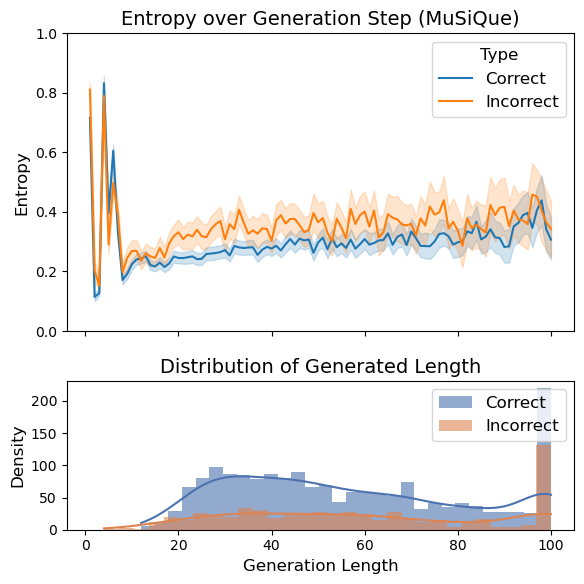

In [6]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_correct_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_correct])
decore_correct_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_correct])

decore_incorrect_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_incorrect])
decore_incorrect_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_incorrect])

types = ['Correct'] * len(decore_correct_data_flat) + ['Incorrect'] * len(decore_incorrect_data_flat)
timesteps = np.concatenate((decore_correct_timesteps, decore_incorrect_timesteps))
data_flat = np.concatenate((decore_correct_data_flat, decore_incorrect_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_correct, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='Correct', alpha=0.6)
sns.histplot(decore_lengths_incorrect, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Incorrect', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_open_book_llama3_8b_instruct_decore_entropy_alpha_correct_incorrect_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [9]:
correct_auecs = []
for alphas in decore_alphas_correct:
    correct_auecs += [auec(alphas)]

incorrect_auecs = []
for alphas in decore_alphas_incorrect:
    incorrect_auecs += [auec(alphas)]


print("Correct AUEC:", np.mean(correct_auecs))
print("Incorrect AUEC:", np.mean(incorrect_auecs))

Correct AUEC: 15.939178821379462
Incorrect AUEC: 20.072419167970303


In [14]:
correct_auecs = []
for alphas in decore_alphas_correct:
    correct_auecs += [sum(alphas) / len(alphas)]

incorrect_auecs = []
for alphas in decore_alphas_incorrect:
    incorrect_auecs += [sum(alphas) / len(alphas)]


print("Correct AUEC:", np.mean(correct_auecs))
print("Incorrect AUEC:", np.mean(incorrect_auecs))

Correct AUEC: 0.2799288597759724
Incorrect AUEC: 0.33324226121199585


In [24]:
for idx, label in enumerate(decore_ob_data["labels"]):
    if label == 1:
        print(label)
        # Correct generation
        print("=====================================")
        print("IDX: ", idx)
        print("Paragraphs: ", dola_ob_data["paragraphs"][idx])
        print("Question: ", dola_ob_data["questions"][idx])
        print("Ground truth: ", dola_ob_data["answers"][idx])
        print("Predicted Answer: ", dola_ob_data["predicted_answers"][idx])
        print("=====================================")

1.0
IDX:  0
Paragraphs:  [{'title': ['Miquette Giraudy'], 'paragraph_text': ['Miquette Giraudy (born 9 February 1953, Nice, France) is a keyboard player and vocalist, best known for her work in Gong and with her partner Steve Hillage. She and Hillage currently form the core of the ambient band System 7. In addition to her performances in music, she has also worked as an actress, film editor and writer. In each role, she has used different stage names.']}, {'title': ['Green (Steve Hillage album)'], 'paragraph_text': ['Green is the fourth studio album by British progressive rock musician Steve Hillage. Written in spring 1977 at the same time as his previous album, the funk-inflected "Motivation Radio" (1977), "Green" was originally going to be released as "The Green Album" as a companion to "The Red Album" (the originally intended name for "Motivation Radio"). However, this plan was dropped and after a US tour in late 1977, "Green" was recorded alone, primarily in Dorking, Surrey, and in

In [50]:
for idx, (baseline_label, decore_label) in enumerate(zip(baseline_ob_data["labels"], decore_ob_data["labels"])):
    if decore_label == 1 and baseline_label == 0:
        # Correct generation
        print("=====================================")
        print("IDX: ", idx)
        print("Paragraphs: ", decore_ob_data["paragraphs"][idx])
        print("Question: ", decore_ob_data["questions"][idx])
        print("Ground truth: ", decore_ob_data["answers"][idx])
        print("Predicted Answer (Baseline): ", baseline_ob_data["predicted_answers"][idx])
        print("Predicted Answer (DeCoRe): ", decore_ob_data["predicted_answers"][idx])
        print("=====================================")

IDX:  25
Paragraphs:  [{'title': ['The Bruce Lee Band'], 'paragraph_text': ['The Bruce Lee Band (or B. Lee Band) is the name given to the releases of Mike Park and his backing band which has so far included Less Than Jake and the Rx Bandits.']}, {'title': ['Asian Man Records'], 'paragraph_text': ['Asian Man Records is a DIY record label run by Mike Park in Monte Sereno, California. Park started a record label and began releasing music in 1989 under the name Dill Records, with the Asian Man label established May 1996.']}]
Question:  ['What record label did the person who is part of The Bruce Lee Band start?']
Ground truth:  ['Asian Man Records']
Predicted Answer (Baseline):  According to the Wikipedia text, Mike Park, who is part of The Bruce Lee Band, started a record label called Dill Records in 1989.
Predicted Answer (DeCoRe):  According to the Wikipedia Title: Asian Man Records, Mike Park started a record label and began releasing music in 1989 under the name Dill Records. Later, in

In [ ]:
IDX:  645
Paragraphs:  [{'title': ['The Bourne Ultimatum (film)'], 'paragraph_text': ['The Bourne Ultimatum is a 2007 action spy film directed by Paul Greengrass loosely based on the novel of the same name by Robert Ludlum.  The screenplay was written by Tony Gilroy, Scott Z. Burns and George Nolfi and based on a screen story of the novel by Gilroy.  The Bourne Ultimatum is the third in the Jason Bourne film series, being preceded by The Bourne Identity (2002) and The Bourne Supremacy (2004). The fourth film, The Bourne Legacy, was released in August 2012, without the involvement of Damon, and the fifth film (a direct sequel to Ultimatum), Jason Bourne, was released in July 2016.']}, {'title': ['The Bourne Betrayal'], 'paragraph_text': ['The Bourne Betrayal is the title for the novel by Eric Van Lustbader and the fifth novel in the Jason Bourne series created by Robert Ludlum. It was published in June 2007. It is Lustbader\'s second Bourne novel, following "The Bourne Legacy" that was published in 2004. Lustbader has written a sequel to "The Bourne Betrayal" titled "The Bourne Sanction".']}]
Question:  ['What was the story that included the character from The Bourne Betrayal based on?']
Ground truth:  ['the novel of the same name by Robert Ludlum', 'Robert Ludlum']
Predicted Answer (Baseline):  The screenplay for The Bourne Ultimatum was written by Tony Gilroy, Scott Z. Burns, and George Nolfi, and was based on a screen story of the novel by Gilroy.
Predicted Answer (DeCoRe):  The screenplay for The Bourne Ultimatum was written by Tony Gilroy, Scott Z. Burns, and George Nolfi, and was based on a screen story of the novel by Robert Ludlum.

In [124]:
from IPython.display import display, HTML
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct")

# colormap = plt.get_cmap('Oranges')
colormap = sns.color_palette("light:#FFBF00", as_cmap=True)

import numpy as np


def colorize_text(tokens, weights, cmap):
    html_text = ""
    for token, weight in zip(tokens, weights):
        color = cmap(weight)
        color_str = f'rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'
        html_text += f'<span style="background-color: {color_str}; padding: 2px;">{token}</span> '
    return html_text


baseline_predicted_answer = baseline_ob_data["predicted_answers"][645]
dola_predicted_answer = dola_ob_data["predicted_answers"][645]
decore_predicted_answer = decore_ob_data["predicted_answers"][645]
baseline_entropies = baseline_ob_data["alphas"][645]
dola_entropies = dola_ob_data["alphas"][645]
decore_entropies = decore_ob_data["alphas"][645]

baseline_tokens = tokenizer.tokenize(baseline_predicted_answer)
baseline_tokens = [t.replace("Ġ", " ") for t in baseline_tokens]

dola_tokens = tokenizer.tokenize(dola_predicted_answer)
dola_tokens = [t.replace("Ġ", " ") for t in dola_tokens]

decore_tokens = tokenizer.tokenize(decore_predicted_answer)
decore_tokens = [t.replace("Ġ", " ") for t in decore_tokens]

baseline_html = colorize_text(baseline_tokens, baseline_entropies, colormap)
dola_html = colorize_text(dola_tokens, dola_entropies, colormap)
decore_html = colorize_text(decore_tokens, decore_entropies, colormap)

display(HTML(f"<h3>Baseline</h3>{baseline_html}"))
display(HTML(f"<h3>DoLa</h3>{dola_html}"))
display(HTML(f"<h3>DeCoRe</h3>{decore_html}"))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [125]:
def latex_colorize_text(tokens, weights, cmap):
    latex_text = ""
    for token, weight in zip(tokens, weights):
        color = cmap(weight)
        color_str = f'{color[0]:.4f}, {color[1]:.4f}, {color[2]:.4f}'
        latex_text += f'\\colorbox[rgb]{{{color_str}}}{{{token}}} '
    return latex_text

colormap = sns.color_palette("light:#FFBF00", as_cmap=True)
baseline_latex = latex_colorize_text(baseline_tokens, baseline_entropies, colormap)
decore_latex = latex_colorize_text(decore_tokens, decore_entropies, colormap)

In [126]:
baseline_latex

'\\colorbox[rgb]{0.9952, 0.7687, 0.0949}{The} \\colorbox[rgb]{1.0000, 0.7490, 0.0000}{ screenplay} \\colorbox[rgb]{0.9843, 0.8126, 0.3065}{ for} \\colorbox[rgb]{0.9644, 0.8936, 0.6970}{ The} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Bour} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ne} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Ult} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{im} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{atum} \\colorbox[rgb]{0.9668, 0.8838, 0.6495}{ was} \\colorbox[rgb]{0.9953, 0.7679, 0.0912}{ written} \\colorbox[rgb]{0.9620, 0.9035, 0.7444}{ by} \\colorbox[rgb]{0.9530, 0.9398, 0.9196}{ Tony} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Gil} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{roy} \\colorbox[rgb]{0.9620, 0.9035, 0.7444}{,} \\colorbox[rgb]{0.9659, 0.8876, 0.6678}{ Scott} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Z} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{.} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Burns} \\colorbox[rgb]{0.9776, 0.8399, 0.4379}{,} \\colorbox[rgb]{0.9525, 0.9421, 0.

In [127]:
decore_latex

'\\colorbox[rgb]{0.9952, 0.7687, 0.0949}{The} \\colorbox[rgb]{1.0000, 0.7490, 0.0000}{ screenplay} \\colorbox[rgb]{0.9843, 0.8126, 0.3065}{ for} \\colorbox[rgb]{0.9644, 0.8936, 0.6970}{ The} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Bour} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ne} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Ult} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{im} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{atum} \\colorbox[rgb]{0.9668, 0.8838, 0.6495}{ was} \\colorbox[rgb]{0.9953, 0.7679, 0.0912}{ written} \\colorbox[rgb]{0.9620, 0.9035, 0.7444}{ by} \\colorbox[rgb]{0.9530, 0.9398, 0.9196}{ Tony} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Gil} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{roy} \\colorbox[rgb]{0.9620, 0.9035, 0.7444}{,} \\colorbox[rgb]{0.9659, 0.8876, 0.6678}{ Scott} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Z} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{.} \\colorbox[rgb]{0.9525, 0.9421, 0.9305}{ Burns} \\colorbox[rgb]{0.9776, 0.8399, 0.4379}{,} \\colorbox[rgb]{0.9525, 0.9421, 0.

Correct
T-test
DeCoRe
T-statistic: -11.012579521180701
P-value: 7.431442283978131e-28
Baseline
T-statistic: -11.745126701755057
P-value: 2.565913677295896e-31
DoLa
T-statistic: -12.51814485672899
P-value: 3.5064494253717084e-35
U-test
DeCoRe
U statistic: 405038.0
P-value: 3.430877575110185e-24
Baseline
U statistic: 431376.0
P-value: 8.360704259019173e-26
DoLa
U statistic: 428486.0
P-value: 3.6575011934377304e-28


/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kkfn339/miniconda3/envs/decor

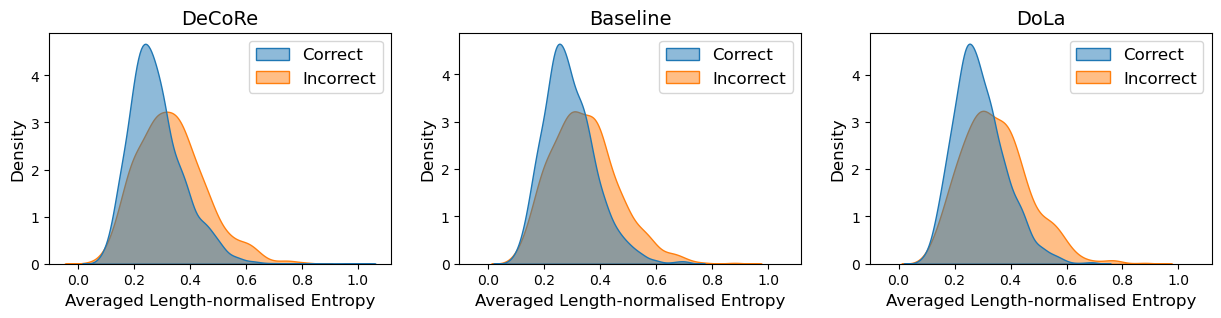

In [107]:
from scipy import stats

print("Correct")

decore_correct_ses = []
for alphas in decore_alphas_correct:
    decore_correct_ses += [sum(alphas)/len(alphas)]

baseline_correct_ses = []
for alphas in baseline_alphas_correct:
    baseline_correct_ses += [sum(alphas)/len(alphas)]

dola_correct_ses = []
for alphas in dola_alphas_correct:
    dola_correct_ses += [sum(alphas)/len(alphas)]


decore_incorrect_ses = []
for alphas in decore_alphas_incorrect:
    decore_incorrect_ses += [sum(alphas)/len(alphas)]

baseline_incorrect_ses = []
for alphas in baseline_alphas_incorrect:
    baseline_incorrect_ses += [sum(alphas)/len(alphas)]

dola_incorrect_ses = []
for alphas in dola_alphas_incorrect:
    dola_incorrect_ses += [sum(alphas)/len(alphas)]

# decore_labels = [1] * len(decore_correct_ses) + [0] * len(decore_incorrect_ses)
# baseline_labels = [1] * len(baseline_correct_ses) + [0] * len(baseline_incorrect_ses)
# dola_labels = [1] * len(dola_correct_ses) + [0] * len(dola_incorrect_ses)

decore_labels = ["Correct"] * len(decore_correct_ses) + ["Incorrect"] * len(decore_incorrect_ses)
baseline_labels = ["Correct"] * len(baseline_correct_ses) + ["Incorrect"] * len(baseline_incorrect_ses)
dola_labels = ["Correct"] * len(dola_correct_ses) + ["Incorrect"] * len(dola_incorrect_ses)

decore_ses = decore_correct_ses + decore_incorrect_ses
baseline_ses = baseline_correct_ses + baseline_incorrect_ses
dola_ses = dola_correct_ses + dola_incorrect_ses

decore_model_type = ["DeCoRe"] * (len(decore_correct_ses) + len(decore_incorrect_ses))
baseline_model_type = ["Baseline"] * (len(baseline_correct_ses) + len(baseline_incorrect_ses))
dola_model_type = ["DoLa"] * (len(dola_correct_ses) + len(dola_incorrect_ses))


# Student T-test
print("T-test")
t_statistic, p_value = stats.ttest_ind(decore_correct_ses, decore_incorrect_ses, alternative="less")

print("DeCoRe")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


t_statistic, p_value = stats.ttest_ind(baseline_correct_ses, baseline_incorrect_ses, alternative="less")

print("Baseline")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


t_statistic, p_value = stats.ttest_ind(dola_correct_ses, dola_incorrect_ses, alternative="less")

print("DoLa")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Mann-Whitney U-test
print("U-test")
decore_u_statistic, decore_p_value = stats.mannwhitneyu(decore_correct_ses, decore_incorrect_ses, alternative="less")

print("DeCoRe")
print(f"U statistic: {decore_u_statistic}")
print(f"P-value: {decore_p_value}")


baseline_u_statistic, baseline_p_value = stats.mannwhitneyu(baseline_correct_ses, baseline_incorrect_ses, alternative="less")

print("Baseline")
print(f"U statistic: {baseline_u_statistic}")
print(f"P-value: {baseline_p_value}")


dola_u_statistic, dola_p_value = stats.mannwhitneyu(dola_correct_ses, dola_incorrect_ses, alternative="less")

print("DoLa")
print(f"U statistic: {dola_u_statistic}")
print(f"P-value: {dola_p_value}")


# sns.regplot(x=decore_ses, y=decore_labels)
# sns.kdeplot(x=decore_ses+baseline_ses+dola_ses, y=decore_labels+baseline_labels+dola_labels, hue=decore_model_type+baseline_model_type+dola_model_type)
fig, axs = plt.subplots(1, 3, figsize=(15, 3), sharex=True)
sns.kdeplot(x=decore_ses, hue=decore_labels, fill=True, common_norm=False, alpha=0.5, ax=axs[0])
sns.kdeplot(x=baseline_ses, hue=baseline_labels, fill=True, common_norm=False, alpha=0.5, ax=axs[1])
sns.kdeplot(x=dola_ses, hue=dola_labels, fill=True, common_norm=False, alpha=0.5, ax=axs[2])

axs[0].set_title("DeCoRe")
axs[1].set_title("Baseline")
axs[2].set_title("DoLa")

axs[0].set_xlabel("Averaged Length-normalised Entropy")
axs[1].set_xlabel("Averaged Length-normalised Entropy")
axs[2].set_xlabel("Averaged Length-normalised Entropy")

# Save figure
plt.savefig('musique_open_book_entropy_correctness_u_test.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'DoLa')

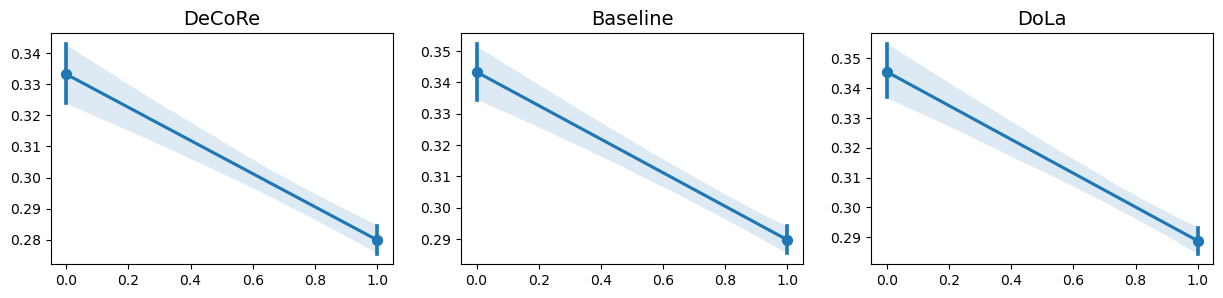

In [104]:
decore_label_ids = [1] * len(decore_correct_ses) + [0] * len(decore_incorrect_ses)
baseline_label_ids = [1] * len(baseline_correct_ses) + [0] * len(baseline_incorrect_ses)
dola_label_ids = [1] * len(dola_correct_ses) + [0] * len(dola_incorrect_ses)




fig, axs = plt.subplots(1, 3, figsize=(15, 3), sharex=True)
sns.regplot(x=decore_label_ids, y=decore_ses, x_estimator=np.mean, ax=axs[0])
sns.regplot(x=baseline_label_ids, y=baseline_ses, x_estimator=np.mean, ax=axs[1])
sns.regplot(x=dola_label_ids, y=dola_ses, x_estimator=np.mean, ax=axs[2])

axs[0].set_title("DeCoRe")
axs[1].set_title("Baseline")
axs[2].set_title("DoLa")

plt.savefig('musique_open_book_entropy_correctness_regplot.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

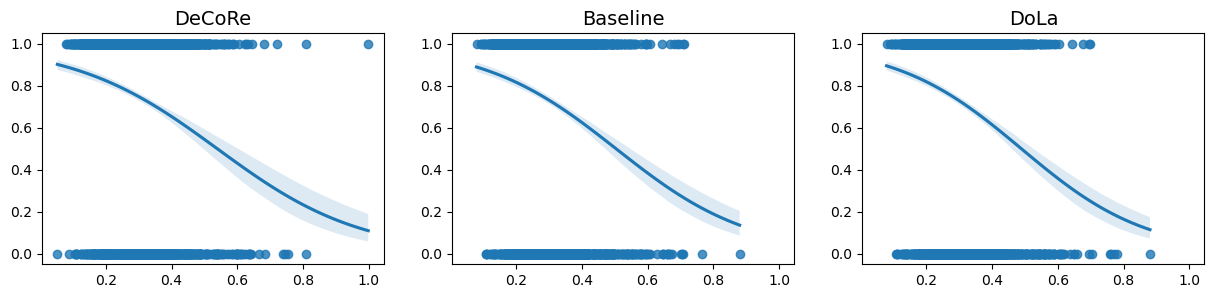

In [106]:
decore_label_ids = [1] * len(decore_correct_ses) + [0] * len(decore_incorrect_ses)
baseline_label_ids = [1] * len(baseline_correct_ses) + [0] * len(baseline_incorrect_ses)
dola_label_ids = [1] * len(dola_correct_ses) + [0] * len(dola_incorrect_ses)




fig, axs = plt.subplots(1, 3, figsize=(15, 3), sharex=True)
sns.regplot(x=decore_ses, y=decore_label_ids, logistic=True, ax=axs[0])
sns.regplot(x=baseline_ses, y=baseline_label_ids, logistic=True, ax=axs[1])
sns.regplot(x=dola_ses, y=dola_label_ids, logistic=True, ax=axs[2])

axs[0].set_title("DeCoRe")
axs[1].set_title("Baseline")
axs[2].set_title("DoLa")

plt.savefig('musique_open_book_entropy_correctness_logregplot.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

In [105]:
correlation, p_value = stats.pointbiserialr(decore_label_ids, decore_ses)
print("DeCoRe")
print(f"Point-biserial correlation: {correlation}")
print(f"P-value: {p_value}")

correlation, p_value = stats.pointbiserialr(baseline_label_ids, baseline_ses)
print("Baseline")
print(f"Point-biserial correlation: {correlation}")
print(f"P-value: {p_value}")

correlation, p_value = stats.pointbiserialr(dola_label_ids, dola_ses)
print("DoLa")
print(f"Point-biserial correlation: {correlation}")
print(f"P-value: {p_value}")


DeCoRe
Point-biserial correlation: -0.21867076468635327
P-value: 1.4862884567956327e-27
Baseline
Point-biserial correlation: -0.23245383823540613
P-value: 5.131827354591434e-31
DoLa
Point-biserial correlation: -0.24684792834045838
P-value: 7.012898850743256e-35


In [91]:
def suggest_statistical_test(data1, data2, paired=False, alpha=0.05):
    # Check if data is continuous
    if not (np.issubdtype(data1.dtype, np.number) and np.issubdtype(data2.dtype, np.number)):
        return "Chi-square test (for categorical data)"

    # Check normality using the Shapiro-Wilk test
    normality1 = stats.shapiro(data1).pvalue > alpha
    normality2 = stats.shapiro(data2).pvalue > alpha

    if not normality1 or not normality2:
        if paired:
            return "Wilcoxon signed-rank test (for paired samples)"
        else:
            return "Mann-Whitney U test (for independent samples, non-parametric)"

    # Check variance equality using Levene's test
    equal_variance = stats.levene(data1, data2).pvalue > alpha

    # Check for small sample size
    if len(data1) < 30 or len(data2) < 30:
        if not normality1 or not normality2:
            if paired:
                return "Wilcoxon signed-rank test (for paired samples with small, non-normal data)"
            else:
                return "Mann-Whitney U test (for independent samples with small, non-normal data)"
        elif not equal_variance:
            return "Welch's t-test (for small samples with unequal variances)"
        else:
            return "T-test (with caution due to small sample size)"

    # Check if samples are paired
    if paired:
        return "Paired t-test"

    # For large sample sizes and normal data
    if equal_variance:
        return "Independent t-test (for independent samples with equal variances)"
    else:
        return "Welch's t-test (for independent samples with unequal variances)"

In [93]:
suggested_test = suggest_statistical_test(np.array(decore_correct_ses), np.array(decore_incorrect_ses))
print(f"Suggested Test: {suggested_test}")
suggested_test = suggest_statistical_test(np.array(baseline_correct_ses), np.array(baseline_incorrect_ses))
print(f"Suggested Test: {suggested_test}")
suggested_test = suggest_statistical_test(np.array(dola_correct_ses), np.array(dola_incorrect_ses))
print(f"Suggested Test: {suggested_test}")

Suggested Test: Mann-Whitney U test (for independent samples, non-parametric)
Suggested Test: Mann-Whitney U test (for independent samples, non-parametric)
Suggested Test: Mann-Whitney U test (for independent samples, non-parametric)
